# COMP60711 - Part 2 Coursework 2

|                           |                                                                                                                                                                               |
|--------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              Course Unit: | COMP60711: Data Engineering                                                                                                                                                   |
| Responsible Staff Member: | Professor John Keane                                                                                                                                                          |
|                    Marks: | This course is worth **25%** of the overall marks for this unit.                                                                                                                |
|              Submissions: | This is the **4th** of **4** assessed submissions.                                                                                                                                    |
|     Method of Submitting: | This notebook, after completion, should be saved as a HTML document and submitted using Blackboard                                                                                      |
|                 Deadline: | Thursday 4th November 9AM (UK time)                                                                                                                                                                            |
|         Late Submissions: | Extensions will only be granted as a result of formally processed [Mitigating Circumstances](http://documents.manchester.ac.uk/DocuInfo.aspx?DocID=427). Marks for late submissions will be reduced in line with the [University policy](http://documents.manchester.ac.uk/display.aspx?DocID=24561). |

Please complete the questions in the spaces provided (under the "Answer" block for each question), then download the notebook in HTML format and submit to Blackboard.

Please also add your student ID and name below.

| Student ID (7-8 digit number) | Full Name |
|:-------------------------------:|:-----------:|
|       10868665                 |  Zirui Wang         |

## Reminders
* **Please make clear any assumptions and provide evidence to justify your answers** 
* Jupyter notebooks use markdown. A brief summary of how to use markdown can be seen [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). Otherwise, please refer to the brief guide on Blackboard.
* You **must** cite any sources used, from web pages to academic papers and textbooks.
* Please ensure your code has no errors, and that the output is shown in your submitted version.
* We have added some general notebooks on Blackboard to cover the basics of plotting in Python, Jupyter notebooks, and anaconda.
* Some questions require a mixture of code and text to answer the question. Marks are awarded based on the output of your code (i.e. graphs) and the explanation provided, not on the code itself.

# Q1: Pre-processing & Feature Importance (9 marks)

This question will use the `"genes-leukemia.csv"` dataset available on Blackboard. For some background information about this dataset, see https://www.kdnuggets.com/data_mining_course/data/genes-leukemia-description.txt. The sub-questions will involve inspecting and pre-processing the data in order to use a decision tree. We will then look at which features are deemed important for prediction, and how removing important features affects tree structure.

It is expected that you will use `pandas` for this question, though this is not a requirement (but it may be more difficult if you do not).

## Q1.1 (1 mark)

Count the number of records/examples where the "Treatment_Response" feature is non-missing. Describe these examples in terms of the other features (Year from XXXX to YYYY, Gender = X etc.)

**Hint:**
* You need to ensure that you are looking at all of the data. By default, some of the columns may be truncated, in which case you should adjust this (through e.g. `pd.set_option("display.max_columns", 100)`)

## Q1.1 Answer

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("genes-leukemia.csv")
pd.set_option("display.max_columns", 100)

print("Data shape: ", data.shape)
data.head(3)

Data shape:  (72, 51)


,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,?,1996,M,?,?,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,?,?,M,?,?,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,?,?,M,?,?,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753


As can be seen from above, this dataset has 75 rows and 51 columns, and there exists missing values filled with "?". Then get the indices of non-missing values in feature [Treatment_Response], and create a subset depending on these indices.

In [3]:
TR_non_empty_indices = data[data["Treatment_Response"]!="?"].index.tolist()
subset = data.loc[TR_non_empty_indices]

print("Number of records where the Treatment_Response is non-missing: ", len(subset))
print("Indices of non-missing records in \"Treatment_Response\"", TR_non_empty_indices)

Number of records where the Treatment_Response is non-missing:  15
Indices of non-missing records in "Treatment_Response" [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 49, 50, 51, 52]


In [4]:
subset

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,AML,BM,?,M2,?,?,79,Failure,0.44,CALGB,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,AML,BM,?,M2,?,?,34,Failure,0.74,CALGB,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,AML,BM,?,M5,?,?,93,Failure,0.80,CALGB,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,AML,BM,?,M4,?,?,77,Failure,0.61,CALGB,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,AML,BM,?,M1,?,?,86,Failure,0.47,CALGB,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,AML,BM,?,M2,?,?,70,Failure,0.89,CALGB,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
33,s34,AML,BM,?,M2,?,?,77,Success,0.64,CALGB,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,AML,BM,?,M1,?,?,67,Success,0.21,CALGB,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,AML,BM,?,M5,?,?,76,Success,0.94,CALGB,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,AML,BM,?,M2,?,?,44,Success,0.95,CALGB,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393


In [5]:
subset["Treatment_Response"].value_counts()

Failure    8
Success    7
Name: Treatment_Response, dtype: int64

In [6]:
subset.groupby("Treatment_Response")["FAB_if_AML"].value_counts()

Treatment_Response  FAB_if_AML
Failure             M2            4
                    M4            2
                    M1            1
                    M5            1
Success             M2            3
                    M1            2
                    M4            1
                    M5            1
Name: FAB_if_AML, dtype: int64

In [7]:
subset[subset["Treatment_Response"]=="Failure"].describe()

,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,0.740000,240.750000,227.500000,574.875000,183.125000,29.000000,348.125000,446.375000,1835.500000,2864.125000,215.375000,216.250000,75.750000,266.000000,322.25000,153.625000,2454.000000,27.125000,128.250000,1050.000000,57.000000,45.250000,46.000000,72.500000,265.000000,47.375000,231.250000,3533.250000,171.250000,1019.125000,302.250000,44.500000,656.000000,529.125000,170.125000,49.37500,63.625000,45.50000,305.125000,36.125000,355.500000
std,0.215936,81.964714,71.238032,247.077453,197.665256,14.501231,222.293524,132.022658,428.973526,902.457666,95.387836,101.316689,72.318245,79.494834,174.84585,88.275441,751.977773,10.934056,131.827539,213.556951,60.982433,63.360082,39.579937,62.459129,170.469939,51.040425,125.210394,1673.047583,55.357926,367.034618,225.017301,25.230367,173.011147,219.592764,112.688493,22.95298,69.319009,24.27815,171.735209,31.215552,160.337145
min,0.440000,100.000000,136.000000,109.000000,20.000000,20.000000,65.000000,259.000000,1339.000000,1736.000000,20.000000,110.000000,20.000000,175.000000,133.00000,29.000000,1373.000000,20.000000,20.000000,677.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,147.000000,1548.000000,112.000000,647.000000,108.000000,20.000000,388.000000,225.000000,59.000000,20.00000,20.000000,20.00000,110.000000,20.000000,190.000000
25%,0.575000,195.250000,160.750000,481.500000,54.750000,20.000000,167.250000,341.250000,1544.750000,2057.750000,204.750000,125.750000,20.000000,216.000000,183.50000,79.750000,2161.500000,20.000000,29.000000,993.000000,22.250000,20.000000,20.000000,20.000000,148.000000,20.000000,163.500000,2307.250000,143.000000,717.500000,196.000000,20.000000,576.000000,395.000000,68.500000,38.75000,20.000000,20.00000,199.250000,20.000000,238.000000
50%,0.770000,235.000000,243.000000,588.500000,118.500000,20.000000,342.500000,459.000000,1771.000000,2978.500000,236.500000,191.500000,39.500000,251.000000,288.50000,160.000000,2488.500000,22.500000,76.000000,1091.000000,34.000000,20.000000,25.000000,45.500000,292.000000,24.500000,172.000000,3322.500000,169.000000,909.000000,257.500000,44.000000,686.500000,548.500000,146.000000,50.00000,20.000000,50.00000,264.500000,20.000000,348.000000
75%,0.910000,304.250000,280.000000,716.500000,237.250000,35.000000,481.250000,503.750000,1974.750000,3458.500000,276.000000,302.000000,117.750000,288.250000,405.25000,212.500000,2644.500000,29.500000,192.000000,1142.000000,60.250000,25.250000,56.250000,120.250000,311.500000,41.250000,237.250000,4065.000000,176.000000,1338.750000,297.750000,54.500000,752.500000,676.500000,252.750000,58.75000,87.250000,57.00000,360.000000,37.250000,396.000000
max,1.000000,346.000000,321.000000,871.000000,628.000000,60.000000,683.000000,672.000000,2693.000000,4249.000000,313.000000,368.000000,210.000000,434.000000,651.00000,293.000000,3818.000000,52.000000,380.000000,1375.000000,202.000000,201.000000,127.000000,178.000000,596.000000,165.000000,514.000000,6218.000000,292.000000,1513.000000,832.000000,90.000000,893.000000,863.000000,339.000000,91.00000,192.000000,88.00000,671.000000,110.000000,688.000000


In [8]:
subset[subset["Treatment_Response"]=="Success"].describe()

,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.710000,218.428571,169.142857,504.571429,115.285714,20.285714,150.285714,410.857143,1583.428571,3304.714286,225.285714,166.857143,55.857143,310.285714,360.428571,138.428571,2491.142857,30.714286,156.714286,504.000000,45.142857,20.0,75.714286,96.285714,221.857143,47.428571,297.714286,2717.142857,191.428571,1771.428571,284.857143,44.714286,518.857143,557.857143,125.857143,40.142857,132.000000,36.428571,258.000000,26.714286,364.714286
std,0.260832,118.250944,124.804418,152.838539,100.935151,0.755929,159.150573,96.335228,404.275837,1073.877664,112.124506,62.621691,52.581456,67.393655,243.333007,69.610481,1103.983005,22.111191,159.195597,236.656573,25.386536,0.0,54.343703,72.701936,122.729280,36.568917,176.641553,1315.025656,71.542195,1362.722992,57.167673,24.736709,352.758382,186.629248,73.128719,19.359998,141.325865,26.298651,109.726934,17.764330,71.948394
min,0.210000,70.000000,20.000000,355.000000,20.000000,20.000000,20.000000,308.000000,801.000000,1125.000000,62.000000,87.000000,20.000000,198.000000,177.000000,57.000000,541.000000,20.000000,20.000000,218.000000,20.000000,20.0,20.000000,20.000000,51.000000,20.000000,108.000000,1050.000000,86.000000,442.000000,232.000000,28.000000,20.000000,291.000000,20.000000,20.000000,20.000000,20.000000,126.000000,20.000000,250.000000
25%,0.625000,107.500000,106.000000,417.000000,45.500000,20.000000,20.000000,340.500000,1470.000000,3251.000000,179.000000,123.000000,20.000000,282.000000,227.000000,73.000000,2211.500000,20.000000,20.000000,281.000000,23.500000,20.0,26.500000,42.500000,146.000000,27.000000,159.500000,1839.000000,154.000000,1044.500000,241.500000,30.000000,251.500000,467.500000,81.500000,26.500000,31.500000,20.000000,164.500000,20.000000,326.500000
50%,0.730000,283.000000,131.000000,449.000000,87.000000,20.000000,118.000000,405.000000,1707.000000,3457.000000,206.000000,163.000000,45.000000,322.000000,288.000000,149.000000,2402.000000,20.000000,117.000000,618.000000,35.000000,20.0,81.000000,74.000000,194.000000,35.000000,254.000000,2612.000000,200.000000,1064.000000,267.000000,36.000000,667.000000,530.000000,139.000000,34.000000,64.000000,25.000000,275.000000,20.000000,391.000000
75%,0.915000,303.000000,205.500000,545.500000,157.500000,20.000000,209.500000,450.000000,1782.000000,3701.000000,272.000000,204.500000,59.000000,335.500000,361.000000,201.500000,3053.500000,28.000000,240.500000,662.500000,67.500000,20.0,107.500000,146.500000,307.500000,49.000000,426.500000,3408.500000,231.000000,2172.500000,315.000000,45.500000,709.000000,655.500000,155.500000,50.000000,200.500000,38.500000,343.500000,20.000000,402.500000
max,0.950000,355.000000,410.000000,803.000000,294.000000,22.000000,455.000000,582.000000,2072.000000,4647.000000,407.000000,263.000000,168.000000,417.000000,882.000000,214.000000,3965.000000,79.000000,439.000000,805.000000,79.000000,20.0,161.000000,202.000000,401.000000,125.000000,550.000000,4863.000000,284.000000,4460.000000,382.000000,98.000000,1024.000000,838.000000,248.000000,74.000000,376.000000,93.000000,389.000000,67.000000,454.000000


In [9]:
(subset[subset["Treatment_Response"]=="Failure"].describe().mean()>subset[subset["Treatment_Response"]=="Success"].describe().mean()).value_counts()

True     26
False    15
dtype: int64

Now the variable "subset" stores the table that the "Treatment_Response" feature is non-missing. There are 15 instances, of which 8 are "Failure" and 7 are "Success".

This subset shows that the data of these patients all come from CALGB Hospital. Regardless of the success of the treatment, they all suffer from AML (Acute Myelogenous Leukemia), and the subtype of leukemia is BM, except for S52 patients who are PB. For different AML subtypes, there are one more patients who failed in M2 and M4 treatments, and one more patients who successed in M1 treatments. Overall, the ratio of failure and success is around to 50%.

The year and gender are missing for some reason, so information cannot be obtained from it. But it should be noted from other features, the value of treatment failure is generally higher than that of treatment success. (26 features mean value with failure higher than success and 15 features mean value with failure lower than success.)

To describe subset instances, we can use the "Class" and "Source" features. The data that has treatment results are all from CALGB hospital and all patients have AML (acute myogenic leukemia).

***

## Q1.2 (1 mark)

Explain why it is not correct to build predictive models for "Treatment_Response" using records where it is missing?

## Q1.2 Answer

Of these 72 instances, only 25 instances have a Treatment_Response value. A model built with too many missing values will have a big bias. The predicted category of this model is likely to be "missing" (ie "?").

***

### From Q1.3-Q1.6 (inclusive), use only the subset of data where "Treatment_Response" is non-missing.

## Q1.3 (1 mark)

Remove the features that are either all the same or have all missing values. Which sample fields should you keep?

**Hints:**
* For simplicity in the following questions, also remove "FAB_if_AML".
* "SNUM" should be the index.

## Q1.3 Answer

Remove "FAB_if_AML" and index the "SNUM".

In [10]:
subset = subset.set_index("SNUM")
subset = subset.drop(labels="FAB_if_AML", axis=1)
subset.head(3)

,CLASS,BM_PB,TB_if_ALL,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,AML,BM,?,?,?,79,Failure,0.44,CALGB,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,AML,BM,?,?,?,34,Failure,0.74,CALGB,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,AML,BM,?,?,?,93,Failure,0.80,CALGB,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208


Remove the features that have all same or missing values.

In [11]:
removed_features = []
for i in subset.columns:
    first_index = subset[i].index[0]
    duplicate = (subset[i].apply( (lambda x: x==subset[i][first_index] )).tolist())
    if sum(duplicate) == len(subset):
        subset = subset.drop(labels=i, axis=1)
        removed_features.append(i)

In [12]:
subset.head(3)

,BM_PB,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,BM,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,BM,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,BM,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208


In [13]:
print("Removed features: ", removed_features)

Removed features:  ['CLASS', 'TB_if_ALL', 'Year', 'Gender', 'Source']


In [14]:
print("Keeped Features: ", subset.columns.tolist(), "\n")
print("Reamined data shape: ", subset.shape)

Keeped Features:  ['BM_PB', 'pct_Blasts', 'Treatment_Response', 'PS', 'D49950', 'D63880', 'J03473', 'J05243', 'L13278', 'L47738', 'M21551_rna1', 'M55150', 'M62762', 'M81933', 'M91432', 'S50223', 'U12471_cds1', 'U32944', 'U35451', 'U50136_rna1', 'U53468', 'U72342', 'U82759', 'X15949', 'X52142', 'X56411_rna1', 'X63469', 'X74262', 'X76061', 'X76648', 'X95735', 'Y08612', 'Y12670', 'D38073', 'AF012024_s', 'D26156_s', 'M84371_rna1_s', 'M31211_s', 'U09087_s', 'U26266_s', 'L49229_f', 'M31523', 'M28170', 'U29175'] 

Reamined data shape:  (15, 44)


The 4 removed features are: ['CLASS', 'TB_if_ALL', 'Year', 'Gender', 'Source']

The 15 features that to be retained: ['BM_PB', 'pct_Blasts', 'Treatment_Response', 'PS', 'D49950', 'D63880', 'J03473', 'J05243', 'L13278', 'L47738', 'M21551_rna1', 'M55150', 'M62762', 'M81933', 'M91432', 'S50223', 'U12471_cds1', 'U32944', 'U35451', 'U50136_rna1', 'U53468', 'U72342', 'U82759', 'X15949', 'X52142', 'X56411_rna1', 'X63469', 'X74262', 'X76061', 'X76648', 'X95735', 'Y08612', 'Y12670', 'D38073', 'AF012024_s', 'D26156_s', 'M84371_rna1_s', 'M31211_s', 'U09087_s', 'U26266_s', 'L49229_f', 'M31523', 'M28170', 'U29175']

Now data has 15 instances and 44 features.

***

## Q1.4 (1 mark)

Fit a decision tree (`DecisionTreeClassifier`) using default settings to the data, now that it has been pre-processed.

As we have a small amount of data, if we want to more meaningfully assess the performance, we should use leave-one-out cross-validation. Report the accuracy across each fold, and the overall mean accuracy obtained.

Important: Please use `random_state=42` where necessary to ensure reproducible results.

## Q1.4 Answer

In [15]:
from sklearn.tree import DecisionTreeClassifier

Split the data as trining data and labels

In [16]:
subset_data = subset.loc[:,subset.columns[subset.columns!="Treatment_Response"]]
subset_label = subset["Treatment_Response"]

In [17]:
subset_data.head(3)

,BM_PB,pct_Blasts,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,BM,79,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,BM,34,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,BM,93,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208


In [18]:
subset_label.head(3)

SNUM
s28    Failure
s29    Failure
s30    Failure
Name: Treatment_Response, dtype: object

For training, convert the values of the "BM_PB" feature to numbers. BM to 0 and PB to 1

In [19]:
def str_to_numerical(input_str):
    str2num = {
        "BM" : 0,
        "PB" : 1
    }
    return str2num.get(input_str)

In [20]:
subset_data["BM_PB"] = subset_data["BM_PB"].apply(lambda x: str_to_numerical(x))
subset_data.tail(3)

,BM_PB,pct_Blasts,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s51,0,57,1.00,211,209,506,48,20,446,339,1339,2120,20,126,20,434,249,160,2335,20,34,677,20,201,30,20,148,30,168,2335,112,683,108,90,667,502,64,50,20,52,110,44,382
s52,1,86,0.61,109,131,488,294,20,455,354,801,3266,62,163,20,198,882,70,541,20,222,218,27,20,20,65,401,35,495,2007,109,442,232,36,20,291,248,20,376,25,139,20,250
s53,0,76,0.89,106,94,449,109,20,118,308,1534,3457,206,135,45,334,177,76,3568,79,439,300,20,20,161,112,162,125,108,3870,284,4460,288,31,1024,530,158,20,119,39,388,20,367


Use leave-one-out cross-validation to train the decision tree classifier.

In [21]:
tree = DecisionTreeClassifier(random_state=42)
accuracy_list = []

for i in subset_data.index.tolist():
    train_indices = subset_data.index.tolist()
    train_indices.remove(i)

    train_x = subset_data.loc[train_indices]
    train_y = subset_label.loc[train_indices]

    test_x = np.asarray(subset_data.loc[i]).reshape(1,-1)
    test_y = subset_label.loc[i]

    tree.fit(X=train_x, y=train_y)
    pred = tree.predict(X=test_x)

    accuracy_list.append(int(pred==test_y))

In [22]:
print("Accuracy of each fold", accuracy_list)
print("Average accuracy", sum(accuracy_list)/len(accuracy_list))

Accuracy of each fold [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]
Average accuracy 0.7333333333333333


The accuracy of each fold is [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]. And average accuracy is 0.7333333333333333

***

## Q1.5 (3 marks)

Split the data into a training and test set (using a 75:25 ratio). Once again, fit a decision tree to this data, and report the accuracy. Visualize the tree (using `tree.plot_tree`), and state which feature/predictor is the most important. Then, removing this top predictor, fit the tree again with this feature removed. Again, report the accuracy and visualize the tree.

Compare the accuracy between the two trees. Explain why the tree is different with this feature removed.

Important: Please use `random_state=3` where necessary to ensure reproducible results.

**Hint:**
* You need to ensure that the _original_ feature names are visible in the tree.

## Q1.5 Answer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

Split data into a training and test set.

In [24]:
train_x, test_x, train_y, test_y = train_test_split(subset_data, subset_label, test_size=0.25, random_state=3)
print("Training data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Training data shape:  (11, 43)
Test data shape:  (4, 43)


Train the classifier.

In [25]:
tree1 = DecisionTreeClassifier(random_state=3)
tree1.fit(X=train_x, y=train_y)
pred1 = tree1.predict(X=test_x)
print("Predicted labels: ", pred1)
print("True labels: ", test_y.tolist())
print("Prediction accuracy: ", sum(pred1 == test_y.tolist())/len(pred1))

Predicted labels:  ['Success' 'Failure' 'Failure' 'Success']
True labels:  ['Failure', 'Failure', 'Failure', 'Success']
Prediction accuracy:  0.75


[Text(167.4, 163.07999999999998, 'U82759 <= 813.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Success'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Success'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Failure')]

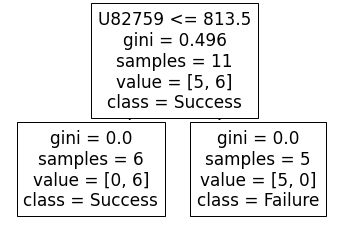

In [26]:
plot_tree(tree1, feature_names=subset_data.columns, class_names=["Failure", "Success"])

Now delete feature U82759 and train the classifier.

In [27]:
train_x = train_x.drop("U82759", axis=1)
test_x = test_x.drop("U82759", axis=1)

tree2 = DecisionTreeClassifier(random_state=3)
tree2.fit(X=train_x, y=train_y)
pred2 = tree2.predict(X=test_x)
print("Predicted labels: ", pred2)
print("True labels: ", test_y.tolist())
print("Prediction accuracy: ", sum(pred2 == test_y.tolist())/len(pred2))

Predicted labels:  ['Success' 'Failure' 'Failure' 'Failure']
True labels:  ['Failure', 'Failure', 'Failure', 'Success']
Prediction accuracy:  0.5


[Text(133.92000000000002, 181.2, 'D63880 <= 133.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Success'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Success'),
 Text(200.88000000000002, 108.72, 'L49229_f <= 193.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Failure'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Success'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Failure')]

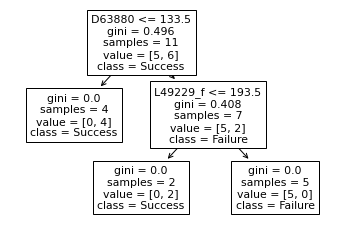

In [28]:
plot_tree(tree2, feature_names=subset_data.columns, class_names=["Failure", "Success"])

First, we can see that the accuracy of the classifier is 75%. It is predicted according to the feature of U82759. When U82759 <= 813.5, it is predicted to be success, and when u82759 > 813.5, it is predicted to be failure.

Subsequently, U82759, the most important feature, was removed, and the accuracy decreased to 50%. In this case, the prediction standard uses D63880 and L49229_f features. It is success when D63880 <= 133.5, otherwise it is predicted that success is when L49229_f <= 193.5, or failure when l49229_f > 193.5.

As using default setting, these dicision trees were built depending on gini index. Gini index represents the certainty or confusion of the data. The higher the value, the data is about chaos (that is, there are multiple labels in the data), the lower the value, the lower the confusion. 

It can be seen from the first tree that only one feature is needed to distinguish the label. And the Gini coefficient after separation is 0. This means that for the training data, the label can be 100% distinguished by u82759. However, after u82759 is removed, two labels are required to complete the classification. The Gini index is 0 after separation means that the training data can also be 100% distinguished.

Combined with the test accuracy, U82759 is an important indicator to distinguish success from failure. Although D63880 and L49229_f perform well on training set, they can't distinguish these two classes in reality. This shows that other features have little difference between success and failure.

***

## Q1.6 (2 marks)

Which tree do you think is more generalizable? You may want to more thoroughly compare the trees (readability, sensitivity/specificity, structure simplicity, etc.).

## Q1.6 Answer

In [29]:
from sklearn.metrics import confusion_matrix

***Before removing feature U82759:***

In [30]:
CM1 = confusion_matrix(test_y, pred1)
CM1 = pd.DataFrame(CM1, index=["True Label Failure","True Label Success"], columns=["Predicted Label Failure", "Predicted Label Success"])
print("confusion matrix: ")
CM1

confusion matrix: 


,Predicted Label Failure,Predicted Label Success
True Label Failure,2,1
True Label Success,0,1


In [31]:
precision1 = CM1["Predicted Label Success"][1]/(CM1["Predicted Label Success"][1] + CM1["Predicted Label Success"][0])
recall1 = CM1["Predicted Label Success"][1]/(CM1["Predicted Label Success"][1] + CM1["Predicted Label Failure"][1])
specificity1 = CM1["Predicted Label Failure"][0]/(CM1["Predicted Label Failure"][0] + CM1["Predicted Label Success"][0])
f1_1 = 2* ((precision1*recall1) / (precision1+recall1))

print("Precision Score: ", precision1)
print("Recall score (Sensitivity): ", recall1)
print("Specificity: ", specificity1)
print("F1 score: ", f1_1)

Precision Score:  0.5
Recall score (Sensitivity):  1.0
Specificity:  0.6666666666666666
F1 score:  0.6666666666666666


***After removing feature U82759:***

In [32]:
CM2 = confusion_matrix(test_y, pred2)
CM2 = pd.DataFrame(CM2, index=["True Label Failure","True Label Success"], columns=["Predicted Label Failure", "Predicted Label Success"])
print("confusion matrix: ")
CM2

confusion matrix: 


,Predicted Label Failure,Predicted Label Success
True Label Failure,2,1
True Label Success,1,0


In [33]:
precision2 = CM2["Predicted Label Success"][1]/(CM2["Predicted Label Success"][1] + CM2["Predicted Label Success"][0])
recall2 = CM2["Predicted Label Success"][1]/(CM2["Predicted Label Success"][1] + CM2["Predicted Label Failure"][1])
specificity2 = CM2["Predicted Label Failure"][0]/(CM2["Predicted Label Failure"][0] + CM2["Predicted Label Success"][0])
f1_2 = 2* ((precision2*recall2) / (precision2+recall2))

print("Precision Score: ", precision2)
print("Recall score (Sensitivity): ", recall2)
print("Specificity: ", specificity2)
print("F1 score: ", f1_2)

Precision Score:  0.0
Recall score (Sensitivity):  0.0
Specificity:  0.6666666666666666
F1 score:  nan


D:\Miniconda\Miniconda\envs\60711\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


***Analysis***

The confusion matrix shows the following information

In [34]:
pd.DataFrame([["True Negative(TN)", "False Positive(FP)"], ["False Negative(FN)", "True Positive(TP)"]], index=["True Label Failure","True Label Success"], columns=["Predicted Label Failure", "Predicted Label Success"])

,Predicted Label Failure,Predicted Label Success
True Label Failure,True Negative(TN),False Positive(FP)
True Label Success,False Negative(FN),True Positive(TP)


Precision measures how good the model is when the prediction is "Success". Formula is $\frac{TP}{TP+FP}$

Recall measures how good the model is at correctly predicting "Success". This is also known as sensitivity. Formula is $\frac{TP}{TP+FN}$

Specificity is similar to sensitivity(or Recall) but focused on "Failure" class. Formula is $\frac{TN}{TN+FP}$

F1 score is a more useful measure than accuracy for problems with uneven class distribution because it takes into account both FP and FN. The best value for F1 score is 1 and the worst is 0. Forluma is $2*\frac{Precision*Recall}{Precision+Recall}$

Through analysis, the first tree and the second tree have the same specificity score, which means that the performance is almost the same when predicting the "Failure" class. However, the first tree has a better performance in predicting the "Success", and the second tree is very bad. Combined with the F1 score, the second tree has a performance of nan (that is 0 , because the numerator and denominator are all 0 so there is a warning), which means that the performance of this tree is very terrible.

Overall, the first tree that with U82759 feature is more generalizable.

***

Reference list for Question 1

Yıldırım, S. (2020). *How to Best Evaluate a Classification Model.* [online] Medium. Available at: https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587 [Accessed 1 Nov. 2021].

***

# Q2: Decision Boundaries (4 marks)

In this question, we will visualize the decision boundaries formed by three simple classifiers on an example dataset.

## Q2.1 (4 marks)

We have provided code below to produce the data and to create the decision boundary. You will need to run this code using the following models:
1. "ZeroR" classifier - `sklearn.dummy.DummyClassifier` using the `"most_frequent"` strategy.
2. KNN classifier - `sklearn.neighbors.KNeighborsClassifier`
3. Decision tree classifier - `sklearn.tree.DecisionTreeClassifier`

You will need to modify the code to output the accuracy for each of the models. Using both this information and the visualized decision boundaries, explain the performance of these algorithms. A brief explanation of the classifiers will be required for this.

**Hints:**
* Although not necessary, the use of further visualizations, performance measures, or even datasets may help to support your discussion
* Use the decision boundaries as a reference point to explain the **differences** between the classifiers.

In [3]:
'''
The code below provides you with the functions to get the data,
and plot the decision boundary.

The resulting graphs have not been properly formatted, however,
so you will need to add that. You will also need to modify the 
code to output the accuracy.
'''

import numpy as np    
from sklearn.datasets import make_classification

def get_data():
    # Create data
    data, labels = make_classification(
        n_features=2, n_redundant=0, n_informative=2,
        random_state=1, n_clusters_per_class=1
    )
    # Set the RNG
    rng = np.random.RandomState(42)
    # Add some noise
    data += 2 * rng.uniform(size=data.shape)
    return data, labels

def plot_boundary(X, ax, clf):
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    return ax
    
def boundary_full(data, labels, model, name, test_x=None, test_y=None, **kwargs):
    # Create estimator/model/classifier
    clf = model(**kwargs)
    
    # Fit the classifier
    clf.fit(data, labels)

    if((type(test_x)==type(None)) & (type(test_y)==type(None))):
        print(name, "accuracy: ", clf.score(data, labels))
    else:
        print(name, "accuracy: ", clf.score(test_x, test_y))

    # Create axis
    fig, ax = plt.subplots()
    # Call the provided function
    ax = plot_boundary(data, ax, clf)
    # Now add the data (using scatter)
    # Ensure to colour the points according to the prediction
    ax.scatter(data[:,0], data[:,1], c=labels, s=20, edgecolor="k")
    # Format the graph...
    ax.set_title(name)

## Q2.1 Answer

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [37]:
data, labels = get_data()
print("Data shape: ", data.shape)

Data shape:  (100, 2)


"ZeroR" Classifier accuracy:  0.5
KNN Classifier accuracy:  0.96
Decision Tree Classifier accuracy:  1.0


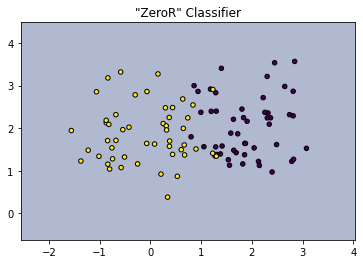

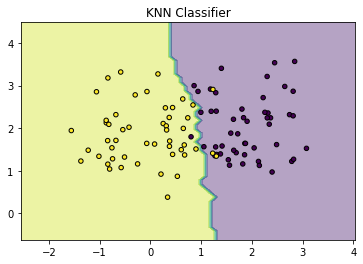

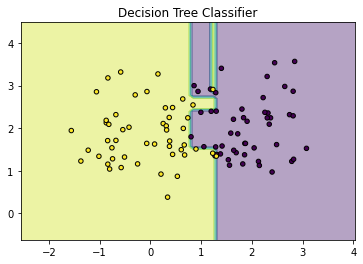

In [38]:
boundary_full(data, labels, DummyClassifier, name='"ZeroR" Classifier', strategy='most_frequent')
boundary_full(data, labels, KNeighborsClassifier, name='KNN Classifier')
boundary_full(data, labels, DecisionTreeClassifier, name='Decision Tree Classifier')

***Train-Test split***

In [39]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size=0.25, shuffle=True, random_state=20)

print("Training data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Training data shape:  (75, 2)
Test data shape:  (25, 2)


'ZeroR' classifier accuracy:  0.44
KNN accuracy:  0.84
Decision Tree accuracy:  0.92


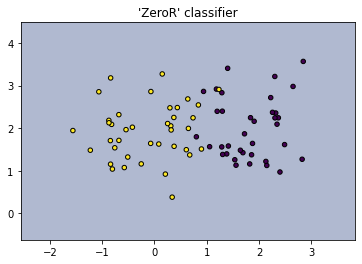

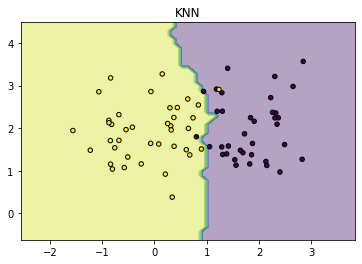

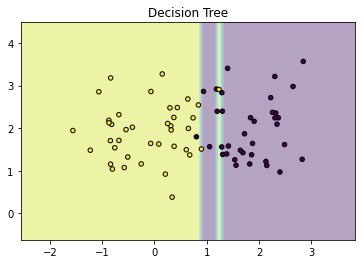

In [40]:
boundary_full(train_x, train_y, DummyClassifier, test_x=test_x, test_y=test_y, name="'ZeroR' classifier", strategy="most_frequent")
boundary_full(train_x, train_y, KNeighborsClassifier, test_x=test_x, test_y=test_y, name="KNN")
boundary_full(train_x, train_y, DecisionTreeClassifier, test_x=test_x, test_y=test_y, name="Decision Tree")

ZeroR: The ZeroR classifier only predicts the class with the highest probability as the classification result of the unknown sample based on the statistical law of historical data. Therefore, it has no decision boundary. When using the training set for testing, the accuracy is 0.5. The number of the two classes in this training set is equal, so this result is as expected. After separating the training set and the test set, the accuracy dropped. This is because there are many instances of a class in the training set, and it will predict this class. Meanwhile, the number of that classes in the test set decreases (because there are 50 instances of each class in this question), so the accuracy drops to 0.44.

K-Nearest Neighbour: KNN training simply remembers the positions of all points. When predicting (this question uses the default setting), calculate the Euclidean distance between the predicted point and all training points, and take the nearest five points by using majority votes for prediction. As can be seen in the figure above, knn has a continuous decision boundary. Even if there are outliers, it can be ignored. Testing with the training set, the accuracy is 0.96. When the training set and the test set were separated, the accuracy dropped to 0.84. By comparing the two graphs, it can be seen that some outliers were divided into the test set. Overall performance is good.

Decision Tree: The above figure shows that the decision boundary of Decision Tree is discrete. Decision Tree is classified by finding the threshold of some features. If there are outliers, it may be further distinguished by some features, which increases the depth of the tree and is easy to overfit. When using the training set as the test set, the accuracy is 1, which means that all points are fitted, including outliers. When the training set and the test set are separated, the accuracy is 0.92, which also distinguishes the outlier.

In summary, ZeroR has no boundaries, knn is a continuous boundary, and Decision Tree is a discrete boundary. ZeroR has the worst performance and is not practical. KNN performs better, but it may affected by outliers. If data is large, the model prediction time will increase. Decision Tree performs best and is not sensitive to outlier, but if there are too many features, it may get overfitted.

***

Question 2 Reference List

Saedsayad.com. (2019). *ZeroR.* [online] Available at: https://www.saedsayad.com/zeror.htm [Accessed 1 Nov. 2021].

***

# Question 3: Training Time Comparison (4 marks)

## Q3.1 (2 marks)

Plot the training time for both `DecisionTreeClassifier` and `GaussianNB` against the data size. A function to generate the data is provided to you, which takes the size as its only argument.

Explain what you observe and your understanding in terms of training time and data size (include a graph). Consider algorithm implementation and potential stochasticity in running times.

In [4]:
# Use this function to measure the time
from time import time

# Use this function to generate the data
def create_data(size):
    # Create data
    data, labels = make_classification(
        n_samples=size,
        n_features=2, n_redundant=0, n_informative=2,
        random_state=4, n_clusters_per_class=1
    )
    return data, labels

## Q3.1 Answer

In [56]:
from sklearn.naive_bayes import GaussianNB

size = [i for i in range(100,1000,100)] + [i for i in range(1000,10000,1000)] + [i for i in range(10000,100001,10000)]
DT_time_list = []
GNB_time_list = []
for i in size:
    data, labels = create_data(i)

    tree = DecisionTreeClassifier()
    gaussian = GaussianNB()

    DT_start_time = time()
    tree.fit(X=data,y=labels)
    DT_time_list.append(time()-DT_start_time)

    GNB_start_time = time()
    gaussian.fit(data, labels)
    GNB_time_list.append(time()-GNB_start_time)

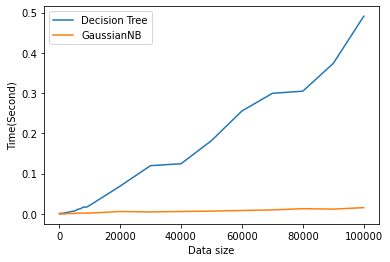

In [57]:
plt.plot(size, DT_time_list, label="Decision Tree")
plt.plot(size, GNB_time_list, label="GaussianNB")
plt.xlabel("Data size")
plt.ylabel("Time(Second)")
plt.legend()
plt.show()

In [50]:
data, labels = create_data(1000)
print("When data size is 1000, the tree deapth: ", DecisionTreeClassifier().fit(data, labels).get_depth())

When data size is 1000, the tree deapth:  7


In [51]:
data, labels = create_data(100000)
print("When data size is 100000, the tree deapth: ", DecisionTreeClassifier().fit(data, labels).get_depth())

When data size is 1000, the tree deapth:  45


It can be seen from the figure that the running time of Decision Tree is proportional to the size of the data. And there seems to be no correlation between the running time of GaussianNB and the size of the data, it increases slightly with the increase of the data.

For the decision tree, when the data is 1000, the depth is 7, and when the data increases to 100,000, the depth is 45. Decision trees usually calculate gini (or entropy) first to determine features and thresholds. As the data increases, the data in each feature also increases, so the amount of calculation becomes larger, and the classification requires deeper depth. Therefore, the direct reason for the increase in time is the deepening of the depth, and the basic reason is the increase in the amount of calculation.

For GaussianNB, it is predicted by calculating prior probability and conditional probability combined with Bayesian formula. It only needs to perform simple statistics, so the amount of calculation is only slightly increased, and the running time does not increase significantly.

***

## Q3.2 (2 marks)
What do you think would happen if we continue increasing the number of instances? Which of the algorithms would be more suitable for a very large number of instances and why? Consider the algorithms’ complexity and how they scale.

## Q3.2 Answer

I think GaussianNB is more suitable for large amount of data prediction. When there is a lot of data, the decision tree requires huge calculations, which not only costs a lot of time, but also becomes very deep and easy to overfit. However, the GaussianNB running time will not increase significantly, and the prediction results of the algorithm can combine all data, and the more data, the better the performance.

***

# Question 4: Memory Usage Comparison (3 marks)

# Q4.1 (3 marks)

Plot the memory usage of the `DecisionTree` model against the data size. Explain the memory usage of the model (including a graph in your answer).

You should use the same `create_data()` function provided for Q3, and ensure that you have downloaded `memory.py` from Blackboard in order to load the `measure_memory()` function.

In [5]:
from memory import measure_memory

## Q4.1 Answer

In [10]:
size = [i for i in range(100,1000,100)] + [i for i in range(1000,10000,1000)] + [i for i in range(10000,100000,10000)]
DT_memory_list = []

for i in size:
    data, labels = create_data(i)
    tree = DecisionTreeClassifier()

    DT_memory_list.append(measure_memory(data, labels, tree))

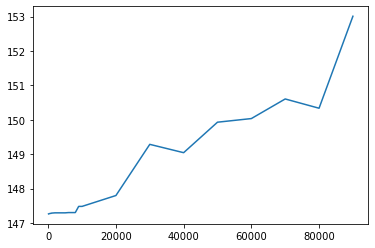

In [11]:
plt.plot(size, DT_memory_list)

As can be seen from the above figure, memory usage increases as data increases.

First of all, there is no doubt that all data are loaded into memory during training, so memory usage increases.

Secondly, considering that Decision Tree uses the default setting in this question, the default setting does not limit the maximum depth of the tree. As the data increases, more nodes are needed for classification, so the tree will become deeper and require more memory usage.

As mentioned above, more data requires more nodes.These nodes require more data to calculate the threshold or gini or entropy value. The increase of the calculation also lead to an increase in memory usage.

In general, the situation of memory usage is complex, including how sklearn implements Decision Tree also affect memory usage (such as the use of good data structures can reduce memory usage), but in general, as data increases, memory usage Increase.

***